<a href="https://colab.research.google.com/github/akshayanant/googlecolab/blob/master/SMLProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.stats as stats
from scipy.stats import norm
import random


In [0]:
Numpyfile= scipy.io.loadmat('mnist_data') 
random.seed(0)

In [0]:
#Extracting Data
x_train = Numpyfile['trX']
y_train = Numpyfile['trY']
x_test = Numpyfile['tsX']
y_test = Numpyfile['tsY']

y_train = y_train.transpose()
y_test = y_test.transpose()


In [0]:
class NBClassifier():
  def __init__(self):
    self.x1_7_mean = None
    self.x2_7_mean = None
    self.x1_8_mean = None
    self.x2_8_mean = None
    self.x1_7_std = None
    self.x2_7_std = None
    self.x1_8_std = None
    self.x2_8_std = None
    self.prob7 = None
    self.prob8 = None
    
  def get_name(self):
    return 'Naive Bayes'
  
  #Entry point to the classifier; to be triggered with the train data
  def fit(self,X,Y,lr=0,epoch=0,plot=False):
    train_7 = []
    train_8 = []
    for i in range(y_train.shape[0]):
      if(y_train[i]==0):
        train_7.append(x_train[i])
      else:
        train_8.append(x_train[i])
    train_7 = np.asarray(train_7)
    train_8 = np.asarray(train_8)  
    self.extract_features(train_7,train_8,plot)
    
  
  #Function Extracting Features 
  def extract_features(self,train_7,train_8,plot): 
    
    x1_7 = train_7.mean(axis=1)
    x2_7 = train_7.std(axis = 1)
    x1_8 = train_8.mean(axis=1)
    x2_8 = train_8.std(axis = 1)
    self.calc_guassian(x1_7,x2_7,x1_8,x2_8,plot)
    
  #Function for Calculating Guassian Values for features
  def calc_guassian(self,x1_7,x2_7,x1_8,x2_8,plot):
    x1_7_mean = x1_7.mean(axis=0)
    x2_7_mean = x2_7.mean(axis=0)
    x1_8_mean = x1_8.mean(axis=0)
    x2_8_mean = x2_8.mean(axis=0)
    x1_7_std = x1_7.std(axis=0)
    x2_7_std = x2_7.std(axis=0)
    x1_8_std = x1_8.std(axis=0)
    x2_8_std = x2_8.std(axis=0)
    prob7 = x1_7.shape[0]/y_train.shape[0]
    prob8 = x1_8.shape[0]/y_train.shape[0]
    self.x1_7_mean = x1_7_mean
    self.x2_7_mean = x2_7_mean
    self.x1_8_mean = x1_8_mean
    self.x2_8_mean = x2_8_mean
    self.x1_7_std = x1_7_std
    self.x2_7_std = x2_7_std
    self.x1_8_std = x1_8_std
    self.x2_8_std = x2_8_std
    self.prob7 = prob7
    self.prob8 = prob8
    if(plot):
      self.plot(x1_7,x1_8,x2_7,x2_8)
      
  
  #Function for plotting the features   
  def plot(self,x1_7,x1_8,x2_7,x2_8):
    plt.plot(x1_7, stats.norm.pdf(x1_7, self.x1_7_mean, self.x1_7_std))
    plt.show()
    plt.plot(x1_8, stats.norm.pdf(x1_8, self.x1_8_mean, self.x1_8_std))
    plt.show()
    plt.plot(x2_7, stats.norm.pdf(x2_7, self.x2_7_mean, self.x2_7_std))
    plt.show()
    plt.plot(x2_8, stats.norm.pdf(x2_8, self.x2_8_mean, self.x2_8_std))
    plt.show()
    
  #Function for predicting the output labels  
  def predict(self,X):
    pred = []
    for x in X:
      x_1 = x.mean()
      x_2 = x.std()
      p7 = norm.logpdf(x_1,self.x1_7_mean,self.x1_7_std)+norm.logpdf(x_2,self.x2_7_mean,self.x2_7_std)+np.log(self.prob7)
      p8 = norm.logpdf(x_1,self.x1_8_mean,self.x1_8_std)+norm.logpdf(x_2,self.x2_8_mean,self.x2_8_std)+np.log(self.prob8)
      if(p7>p8):
        pred.append(0)
      else:
        pred.append(1)
    return pred
  
  #Function for calculating the score
  def score(self,X,Y):
    pred = np.array(self.predict(X))
    suc = 0;
    tot=0
    for i in range(pred.shape[0]):
      tot+=1
      if(pred[i]==Y[i]):
        suc+=1
    return suc/tot

In [0]:
class LogisticRegression():
  
  def __init__(self):
    self.w = None
    
  def get_name(self):
    return 'Logistic Regression'
    
  def prepare_data(self,X):
    X_compressed = np.zeros((X.shape[0],2))
    X_compressed[:,0] = X.mean(axis=1)
    X_compressed[:,1] = X.std(axis=1)
    return X_compressed
    
  def perceptron(self,X):
    return np.dot(X,self.w.T)
  
  def sigmoid(self,X):
    return (1.0/(1.0+np.exp(-X)))
  
  def grad(self,X,Y):
    y_pred = self.sigmoid(self.perceptron(X))
    return (Y-y_pred)*X
  
  def fit(self,X,Y,lr=0.001,epoch = 10,plot=False):
    acc=dict()
    w1 = dict()
    w2 = dict()
    x_com = self.prepare_data(X)
    self.w = np.zeros((1,x_com.shape[1]),dtype=float)
    for e in range(epoch):
      acc[e] = self.score(X,Y)
      dw = 0
      for x,y in zip(x_com,Y):
        dw+=self.grad(x,y)
      self.w+=lr*dw
      w1[e] = self.w[0][0]
      w2[e] = self.w[0][1]
    if(plot):
      plt.plot(acc.values())
      plt.show()
      plt.plot(w1.values())
      plt.show()
      plt.plot(w2.values())
      plt.show()
 
  def predict(self,X):
    y_pred=[]
    for x in X:
      y_pred.append(self.sigmoid(self.perceptron(x)))  
    return np.array(y_pred)
  
  def score(self,X,Y):
    tot = 0
    suc = 0
    x_com = self.prepare_data(X)
    pred = self.predict(x_com)
    for i in range(Y.shape[0]):
      tot+=1
      if((Y[i]==0 and pred[i]<0.5) or (Y[i]==1 and pred[i]>0.5)):
        suc+=1

    return suc/tot
    

In [0]:
def driver(x_train,y_train,x_test,y_test,model,lr = 0.001,epoch = 10,plot = False):
  model.fit(x_train,y_train,lr,epoch,plot)
  tr_acc = model.score(x_train,y_train)
  tst_acc = model.score(x_test,y_test)
  print ('--------Results of %s Claassifier-----------'%model.get_name()) 
  print('Train Accuracy : %f'%tr_acc)
  print('Test Accuracy : %f'%tst_acc)


In [74]:
model = NBClassifier()
driver(x_train,y_train,x_test,y_test,model)



--------Results of Naive Bayes Claassifier-----------
Train Accuracy : 0.683641
Test Accuracy : 0.695305


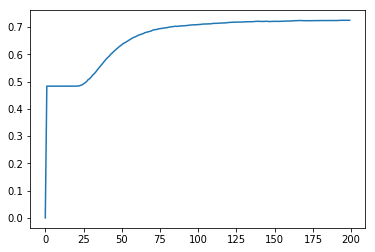

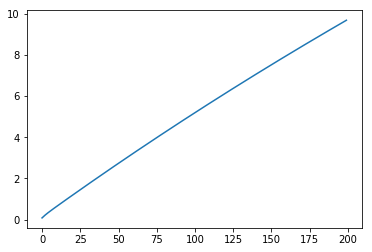

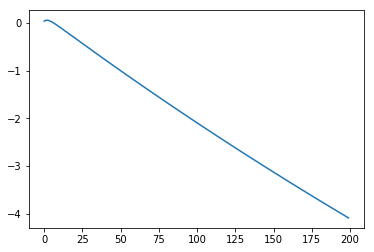

--------Results of Logistic Regression Claassifier-----------
Train Accuracy : 0.724331
Test Accuracy : 0.749750


In [75]:
model = LogisticRegression()
driver(x_train,y_train,x_test,y_test,model,lr = 0.001,epoch=200,plot=True)